In [1]:

df = pd.read_csv('/home/sreeraj/lab/nsf/final_eval/results/across_model_ffhq_face_subject.csv',)
fig = px.bar(df, x='Model', y=['Male Acc', 'Female Acc', 'Avg Acc', 'MCC'], title='Train : FFHQ Face, Test : FFHQ Face', barmode='group', labels={'value': 'Acc/MCC', 'variable': 'Metrics'},width=800, height=400)
fig.show()

ModuleNotFoundError: No module named 'plotly'

In [ ]:
import pickle 
with open('/home/sreeraj/lab/nsf/final_eval/results/across_model_ffhq_face_gender_stats.pickle', 'rb') as f:
    data = pickle.load(f)
models = data['models']
stats = data['stats']
print(stats)

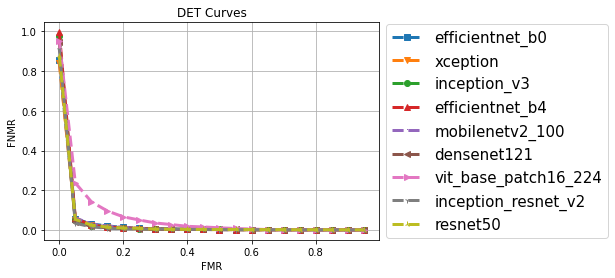

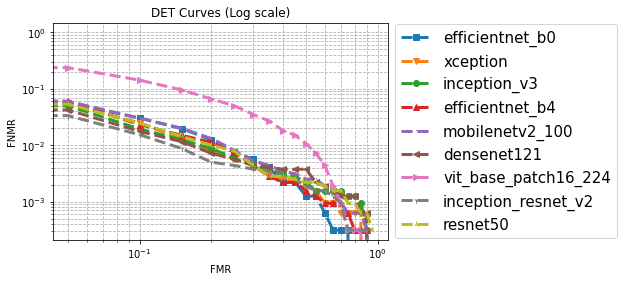

In [31]:
from os.path import join

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.font_manager import FontProperties
STYLES = ['s--', 'v--', 'o--', '^--', ',--', '<--', '>--', '1--', '2--',
        '3--', '4--', '.--', 'p--', '*--', 'h--', 'H--', '+--', 'x--',
        'd--', '|--', '---']
def plt_det_curve(stats, ids, line_width=3, lgf_size=15, save_plots=True,
                dpi=None, save_path='', ext='.png', resampling=True):
    det_fig = plt.figure()
    det_lg_fig = plt.figure()

    det_plot = det_fig.add_subplot(111)
    det_plot.set_title('DET Curves')
    det_plot.set_ylabel('FNMR')
    det_plot.set_xlabel('FMR')
    det_plot.grid(True)

    det_lg_plot = det_lg_fig.add_subplot(111)
    det_lg_plot.set_title('DET Curves (Log scale)')
    det_lg_plot.set_ylabel('FNMR')
    det_lg_plot.set_xlabel('FMR')
    det_lg_plot.set_yscale('log')
    det_lg_plot.set_xscale('log')
    det_lg_plot.grid(True, which='both', ls='--')

    for i, st in enumerate(stats):

        if resampling:
            x = np.arange(0, 1, 0.05)
            y = np.interp(x, st.fmr[::-1], st.fnmr[::-1])
        else:
            x = st.fmr
            y = st.fnmr

        # Plotting DET Curve
        det_plot.plot(
            x, y,
            STYLES[i],
            label=ids[i],
            linewidth=line_width,
            pickradius=0.5
        )
        det_lg_plot.plot(
            x, y,
            STYLES[i],
            label=ids[i],
            linewidth=line_width,
            pickradius=0.5
        )

    # Finalizing plots
    det_plot.legend(loc='center left', prop=FontProperties(size=lgf_size), bbox_to_anchor=(1, 0.5))
    det_lg_plot.legend(loc='center left', prop=FontProperties(size=lgf_size), bbox_to_anchor=(1, 0.5))

    # Showing plots or saving plots
    if save_plots:
        # saving plots
        det_fig.savefig(join(save_path, 'DET' + ext), dpi=dpi)
        det_lg_fig.savefig(join(save_path, 'DET (Log)' + ext), dpi=dpi)
        plt.close('all')
    else:
        plt.show()


def plt_error_curves(stats, ids, line_width=3, lgf_size=15, save_plots=True,
                    dpi=None, save_path='', ext='.png'):
    for i, st in enumerate(stats):
        # Plotting FMR and FNMR curves
        eer_fig = plt.figure()
        eer_plot = eer_fig.add_subplot(111)
        eer_plot.grid(True)
        eer_plot.set_ylabel('Error')
        eer_plot.set_xlabel('Matching Scores')
        eer_plot.set_title('FMR and FNMR Curves')
        eer_plot.set_yscale('log')
        eer_plot.plot(st.thrs, st.fmr, linewidth=line_width,
                    label=ids[i] + ' (FMR)')
        eer_plot.plot(st.thrs, st.fnmr, linewidth=line_width,
                    label=ids[i] + ' (FNMR)')
        eer_plot.legend(loc='center left', prop=FontProperties(size=lgf_size), bbox_to_anchor=(1, 0.5))

        if save_plots:
            fname = 'FMR and FNMR curves (%s)' % ids[i] + ext
            eer_fig.savefig(join(save_path, fname), dpi=dpi)
            plt.close('all')
        else:
            plt.show()
# plt_error_curves(stats=stats, ids=models, save_plots=False)
plt_det_curve(stats, models, line_width=3, lgf_size=15, save_plots=False,
                dpi=None, save_path='', ext='.png', resampling=True)

In [21]:
import plotly.express as px
import pandas as pd
from copy import deepcopy

df_50 = pd.read_csv('/home/sreeraj/lab/nsf/final_eval/results/across_model_ndiris_subject_report.csv', header=1)
df_50['Data Balance'] = 'F50'

df = pd.read_csv('/home/sreeraj/lab/nsf/final_eval/results/across_databalance_ndiris_subject_report.csv', header=1)
df = df.iloc[:-15]

df['Data Balance'] = df['Experiment ID'].apply(lambda x:float(x.split('_')[-1]))
df['Data Balance'] = df['Data Balance'].apply(lambda x:f'F{int(x*100)}')
df['Experiment ID'] = df['Experiment ID'].apply(lambda x: '_'.join(x.split('_')[:-1]))

df_50 = df_50[df_50['Experiment ID'].isin(df['Experiment ID'].unique())]
df = pd.concat([df_50, df])



df['Gender'] = df['Experiment ID'].apply(lambda x: x.split('_')[-1])
df = df[df['Gender'] == 'all']
df['Experiment ID'] = df['Experiment ID'].apply(lambda x: '_'.join(x.split('_')[:-1]))

df.head()

df_auc = deepcopy(df)
df_auc['Value'] = df_auc['AUC']
df_auc['Metric'] = 'AUC'

df_eer = deepcopy(df)
df_eer['Value'] = df_eer['EER']
df_eer['Metric'] = 'EER'

df_dprime = deepcopy(df)
df_dprime['Value'] = df_dprime["Sensitivity index (d')"]
df_dprime['Metric'] = 'dprime'

df_mcc = deepcopy(df)
df_mcc['Value'] = df_mcc['MCC']
df_mcc['Metric'] = 'MCC'

df_jindex = deepcopy(df)
df_jindex['Value'] = df_mcc['J-Index']
df_jindex['Metric'] = 'J-Index'

df = pd.concat([df_auc, df_eer, df_mcc, df_dprime, df_jindex])
print(df.head())

fig = px.bar(df, x='Experiment ID', y=['Value'], title='Train : NDIris, Test : NDIris (All)', barmode='group', color='Data Balance', labels={'value': 'Value', 'variable': 'Metrics'},width=1000, height=500, facet_col='Metric')
fig.update_yaxes(matches=None)
fig.show()

           Experiment ID     GMean      GSTD     IMean      ISTD  \
5               xception  0.926618  0.074558  0.544803  0.160349   
8           inception_v3  0.884480  0.078884  0.545933  0.128013   
20  vit_base_patch16_224  0.861182  0.066213  0.548118  0.125470   
2   vit_base_patch16_224  0.856255  0.068629  0.540527  0.132107   
5   vit_base_patch16_224  0.834315  0.076371  0.544818  0.126735   

    Sensitivity index (d')       AUC   J-Index  J-Index_TH       MCC  ...  \
5                 3.053507  0.986040  0.889523    0.794016  0.784215  ...   
8                 3.184070  0.984558  0.882606    0.748019  0.787416  ...   
20                3.120751  0.985591  0.881141    0.750513  0.804985  ...   
2                 2.999325  0.983028  0.869448    0.740541  0.771214  ...   
5                 2.766897  0.971545  0.821250    0.722414  0.703842  ...   

    ZeroFMR_TH  FMR1000_TH  FMR100_TH  FMR20_TH  FMR10_TH  ZeroFNMR_TH  \
5     1.156471    0.976069   0.893364  0.808655  0.756

In [22]:
import plotly.express as px
import pandas as pd
from copy import deepcopy

df_50 = pd.read_csv('/home/sreeraj/lab/nsf/final_eval/results/across_model_ndiris_subject_report.csv', header=1)
df_50['Data Balance'] = 'F50'

df = pd.read_csv('/home/sreeraj/lab/nsf/final_eval/results/across_databalance_ndiris_subject_report.csv', header=1)
df = df.iloc[:-15]

df['Data Balance'] = df['Experiment ID'].apply(lambda x:float(x.split('_')[-1]))
df['Data Balance'] = df['Data Balance'].apply(lambda x:f'F{int(x*100)}')
df['Experiment ID'] = df['Experiment ID'].apply(lambda x: '_'.join(x.split('_')[:-1]))

df_50 = df_50[df_50['Experiment ID'].isin(df['Experiment ID'].unique())]
df = pd.concat([df_50, df])



df['Gender'] = df['Experiment ID'].apply(lambda x: x.split('_')[-1])
df = df[df['Gender'] == 'female']
df['Experiment ID'] = df['Experiment ID'].apply(lambda x: '_'.join(x.split('_')[:-1]))

df.head()

df_auc = deepcopy(df)
df_auc['Value'] = df_auc['AUC']
df_auc['Metric'] = 'AUC'

df_eer = deepcopy(df)
df_eer['Value'] = df_eer['EER']
df_eer['Metric'] = 'EER'

df_dprime = deepcopy(df)
df_dprime['Value'] = df_dprime["Sensitivity index (d')"]
df_dprime['Metric'] = 'dprime'

df_mcc = deepcopy(df)
df_mcc['Value'] = df_mcc['MCC']
df_mcc['Metric'] = 'MCC'

df_jindex = deepcopy(df)
df_jindex['Value'] = df_mcc['J-Index']
df_jindex['Metric'] = 'J-Index'

df = pd.concat([df_auc, df_eer, df_mcc, df_dprime, df_jindex])
print(df.head())

fig = px.bar(df, x='Experiment ID', y=['Value'], title='Train : NDIris, Test : NDIris (Female)', barmode='group', color='Data Balance', labels={'value': 'Value', 'variable': 'Metrics'},width=1000, height=500, facet_col='Metric')
fig.update_yaxes(matches=None)
fig.show()

           Experiment ID     GMean      GSTD     IMean      ISTD  \
4               xception  0.928903  0.072743  0.559618  0.166908   
7           inception_v3  0.890476  0.072333  0.565073  0.128488   
19  vit_base_patch16_224  0.864320  0.063720  0.542363  0.131652   
1   vit_base_patch16_224  0.865888  0.065799  0.530651  0.139452   
4   vit_base_patch16_224  0.853893  0.069974  0.528647  0.146920   

    Sensitivity index (d')       AUC   J-Index  J-Index_TH       MCC  ...  \
4                 2.868382  0.980445  0.857300    0.807539  0.811926  ...   
7                 3.121008  0.979914  0.878273    0.760074  0.815160  ...   
19                3.113031  0.984010  0.871142    0.752652  0.825606  ...   
1                 3.074638  0.986607  0.877049    0.748835  0.844335  ...   
4                 2.826528  0.969532  0.815150    0.735727  0.740535  ...   

    ZeroFMR_TH  FMR1000_TH  FMR100_TH  FMR20_TH  FMR10_TH  ZeroFNMR_TH  \
4     1.157845    0.981028   0.911252  0.837032  0.787

In [23]:
import plotly.express as px
import pandas as pd
from copy import deepcopy

df_50 = pd.read_csv('/home/sreeraj/lab/nsf/final_eval/results/across_model_ndiris_subject_report.csv', header=1)
df_50['Data Balance'] = 'F50'

df = pd.read_csv('/home/sreeraj/lab/nsf/final_eval/results/across_databalance_ndiris_subject_report.csv', header=1)
df = df.iloc[:-15]

df['Data Balance'] = df['Experiment ID'].apply(lambda x:float(x.split('_')[-1]))
df['Data Balance'] = df['Data Balance'].apply(lambda x:f'F{int(x*100)}')
df['Experiment ID'] = df['Experiment ID'].apply(lambda x: '_'.join(x.split('_')[:-1]))

df_50 = df_50[df_50['Experiment ID'].isin(df['Experiment ID'].unique())]
df = pd.concat([df_50, df])



df['Gender'] = df['Experiment ID'].apply(lambda x: x.split('_')[-1])
df = df[df['Gender'] == 'male']
df['Experiment ID'] = df['Experiment ID'].apply(lambda x: '_'.join(x.split('_')[:-1]))

df.head()

df_auc = deepcopy(df)
df_auc['Value'] = df_auc['AUC']
df_auc['Metric'] = 'AUC'

df_eer = deepcopy(df)
df_eer['Value'] = df_eer['EER']
df_eer['Metric'] = 'EER'

df_dprime = deepcopy(df)
df_dprime['Value'] = df_dprime["Sensitivity index (d')"]
df_dprime['Metric'] = 'dprime'

df_mcc = deepcopy(df)
df_mcc['Value'] = df_mcc['MCC']
df_mcc['Metric'] = 'MCC'

df_jindex = deepcopy(df)
df_jindex['Value'] = df_mcc['J-Index']
df_jindex['Metric'] = 'J-Index'

df = pd.concat([df_auc, df_eer, df_mcc, df_dprime, df_jindex])
print(df.head())

fig = px.bar(df, x='Experiment ID', y=['Value'], title='Train : NDIris, Test : NDIris (Male)', barmode='group', color='Data Balance', labels={'value': 'Value', 'variable': 'Metrics'},width=1000, height=500, facet_col='Metric')
fig.update_yaxes(matches=None)
fig.show()

           Experiment ID     GMean      GSTD     IMean      ISTD  \
3               xception  0.926580  0.076059  0.585126  0.149582   
6           inception_v3  0.886073  0.080914  0.561180  0.125722   
18  vit_base_patch16_224  0.863976  0.066404  0.563739  0.122559   
0   vit_base_patch16_224  0.858690  0.069638  0.558222  0.127405   
3   vit_base_patch16_224  0.829504  0.076940  0.552005  0.118944   

    Sensitivity index (d')       AUC   J-Index  J-Index_TH       MCC  ...  \
3                 2.877610  0.982186  0.878034    0.798753  0.790404  ...   
6                 3.073170  0.983045  0.875264    0.752972  0.820910  ...   
18                3.046087  0.984858  0.879144    0.756755  0.839048  ...   
0                 2.926593  0.981216  0.857334    0.746260  0.800490  ...   
3                 2.770337  0.972834  0.823414    0.713721  0.758483  ...   

    ZeroFMR_TH  FMR1000_TH  FMR100_TH  FMR20_TH  FMR10_TH  ZeroFNMR_TH  \
3     1.161337    0.990532   0.906963  0.821246  0.771

In [25]:
import plotly.express as px
import pandas as pd
from copy import deepcopy

df_50 = pd.read_csv('/home/sreeraj/lab/nsf/final_eval/results/across_model_notredame_ocular_nir_subject_report.csv', header=1)
df_50['Data Balance'] = 'F50'

df = pd.read_csv('/home/sreeraj/lab/nsf/final_eval/results/across_databalance_notredame_ocular_nir_subject_report.csv', header=1)
df = df.iloc[:-15]

df['Data Balance'] = df['Experiment ID'].apply(lambda x:float(x.split('_')[-1]))
df['Data Balance'] = df['Data Balance'].apply(lambda x:f'F{int(x*100)}')
df['Experiment ID'] = df['Experiment ID'].apply(lambda x: '_'.join(x.split('_')[:-1]))

df_50 = df_50[df_50['Experiment ID'].isin(df['Experiment ID'].unique())]
df = pd.concat([df_50, df])



df['Gender'] = df['Experiment ID'].apply(lambda x: x.split('_')[-1])
df = df[df['Gender'] == 'all']
df['Experiment ID'] = df['Experiment ID'].apply(lambda x: '_'.join(x.split('_')[:-1]))

df.head()

df_auc = deepcopy(df)
df_auc['Value'] = df_auc['AUC']
df_auc['Metric'] = 'AUC'

df_eer = deepcopy(df)
df_eer['Value'] = df_eer['EER']
df_eer['Metric'] = 'EER'

df_dprime = deepcopy(df)
df_dprime['Value'] = df_dprime["Sensitivity index (d')"]
df_dprime['Metric'] = 'dprime'

df_mcc = deepcopy(df)
df_mcc['Value'] = df_mcc['MCC']
df_mcc['Metric'] = 'MCC'

df_jindex = deepcopy(df)
df_jindex['Value'] = df_mcc['J-Index']
df_jindex['Metric'] = 'J-Index'

df = pd.concat([df_auc, df_eer, df_mcc, df_dprime, df_jindex])
print(df.head())

fig = px.bar(df, x='Experiment ID', y=['Value'], title='Train : Notredame Ocular NIR, Test : Notredame Ocular NIR (All)', barmode='group', color='Data Balance', labels={'value': 'Value', 'variable': 'Metrics'},width=1000, height=500, facet_col='Metric')
fig.update_yaxes(matches=None)
fig.show()

           Experiment ID     GMean      GSTD     IMean      ISTD  \
5               xception  0.929190  0.066985  0.564675  0.129277   
17           densenet121  0.943279  0.058677  0.563015  0.139078   
20  vit_base_patch16_224  0.906247  0.058501  0.537637  0.111564   
2   vit_base_patch16_224  0.905600  0.062975  0.549298  0.121245   
5   vit_base_patch16_224  0.891506  0.069556  0.552093  0.126863   

    Sensitivity index (d')       AUC   J-Index  J-Index_TH       MCC  ...  \
5                 3.540535  0.992931  0.927093    0.790192  0.904876  ...   
17                3.562605  0.994818  0.930784    0.815837  0.917468  ...   
20                4.138176  0.996730  0.948716    0.770668  0.947736  ...   
2                 3.688128  0.992447  0.915775    0.783404  0.908279  ...   
5                 3.317688  0.986462  0.880577    0.767238  0.859219  ...   

    ZeroFMR_TH  FMR1000_TH  FMR100_TH  FMR20_TH  FMR10_TH  ZeroFNMR_TH  \
5     1.101241    0.967434   0.856502  0.776156  0.733

In [26]:
import plotly.express as px
import pandas as pd
from copy import deepcopy

df_50 = pd.read_csv('/home/sreeraj/lab/nsf/final_eval/results/across_model_notredame_ocular_nir_subject_report.csv', header=1)
df_50['Data Balance'] = 'F50'

df = pd.read_csv('/home/sreeraj/lab/nsf/final_eval/results/across_databalance_notredame_ocular_nir_subject_report.csv', header=1)
df = df.iloc[:-15]

df['Data Balance'] = df['Experiment ID'].apply(lambda x:float(x.split('_')[-1]))
df['Data Balance'] = df['Data Balance'].apply(lambda x:f'F{int(x*100)}')
df['Experiment ID'] = df['Experiment ID'].apply(lambda x: '_'.join(x.split('_')[:-1]))

df_50 = df_50[df_50['Experiment ID'].isin(df['Experiment ID'].unique())]
df = pd.concat([df_50, df])



df['Gender'] = df['Experiment ID'].apply(lambda x: x.split('_')[-1])
df = df[df['Gender'] == 'male']
df['Experiment ID'] = df['Experiment ID'].apply(lambda x: '_'.join(x.split('_')[:-1]))

df.head()

df_auc = deepcopy(df)
df_auc['Value'] = df_auc['AUC']
df_auc['Metric'] = 'AUC'

df_eer = deepcopy(df)
df_eer['Value'] = df_eer['EER']
df_eer['Metric'] = 'EER'

df_dprime = deepcopy(df)
df_dprime['Value'] = df_dprime["Sensitivity index (d')"]
df_dprime['Metric'] = 'dprime'

df_mcc = deepcopy(df)
df_mcc['Value'] = df_mcc['MCC']
df_mcc['Metric'] = 'MCC'

df_jindex = deepcopy(df)
df_jindex['Value'] = df_mcc['J-Index']
df_jindex['Metric'] = 'J-Index'

df = pd.concat([df_auc, df_eer, df_mcc, df_dprime, df_jindex])
print(df.head())

fig = px.bar(df, x='Experiment ID', y=['Value'], title='Train : Notredame Ocular NIR, Test : Notredame Ocular NIR (Male)', barmode='group', color='Data Balance', labels={'value': 'Value', 'variable': 'Metrics'},width=1000, height=500, facet_col='Metric')
fig.update_yaxes(matches=None)
fig.show()

           Experiment ID     GMean      GSTD     IMean      ISTD  \
3               xception  0.933631  0.067015  0.590109  0.121605   
15           densenet121  0.949301  0.054413  0.607315  0.118269   
18  vit_base_patch16_224  0.910722  0.053945  0.566882  0.115608   
0   vit_base_patch16_224  0.914345  0.055913  0.585871  0.123801   
3   vit_base_patch16_224  0.898730  0.064056  0.593488  0.124042   

    Sensitivity index (d')       AUC   J-Index  J-Index_TH       MCC  ...  \
3                 3.498889  0.993194  0.923635    0.792344  0.905216  ...   
15                3.715008  0.994723  0.930496    0.830575  0.917813  ...   
18                3.811593  0.996073  0.942292    0.787750  0.936184  ...   
0                 3.419646  0.992657  0.919537    0.806711  0.916339  ...   
3                 3.092131  0.985080  0.876799    0.787509  0.861514  ...   

    ZeroFMR_TH  FMR1000_TH  FMR100_TH  FMR20_TH  FMR10_TH  ZeroFNMR_TH  \
3     1.052665    0.940221   0.857926  0.784716  0.744

In [27]:
import plotly.express as px
import pandas as pd
from copy import deepcopy

df_50 = pd.read_csv('/home/sreeraj/lab/nsf/final_eval/results/across_model_notredame_ocular_nir_subject_report.csv', header=1)
df_50['Data Balance'] = 'F50'

df = pd.read_csv('/home/sreeraj/lab/nsf/final_eval/results/across_databalance_notredame_ocular_nir_subject_report.csv', header=1)
df = df.iloc[:-15]

df['Data Balance'] = df['Experiment ID'].apply(lambda x:float(x.split('_')[-1]))
df['Data Balance'] = df['Data Balance'].apply(lambda x:f'F{int(x*100)}')
df['Experiment ID'] = df['Experiment ID'].apply(lambda x: '_'.join(x.split('_')[:-1]))

df_50 = df_50[df_50['Experiment ID'].isin(df['Experiment ID'].unique())]
df = pd.concat([df_50, df])



df['Gender'] = df['Experiment ID'].apply(lambda x: x.split('_')[-1])
df = df[df['Gender'] == 'female']
df['Experiment ID'] = df['Experiment ID'].apply(lambda x: '_'.join(x.split('_')[:-1]))

df.head()

df_auc = deepcopy(df)
df_auc['Value'] = df_auc['AUC']
df_auc['Metric'] = 'AUC'

df_eer = deepcopy(df)
df_eer['Value'] = df_eer['EER']
df_eer['Metric'] = 'EER'

df_dprime = deepcopy(df)
df_dprime['Value'] = df_dprime["Sensitivity index (d')"]
df_dprime['Metric'] = 'dprime'

df_mcc = deepcopy(df)
df_mcc['Value'] = df_mcc['MCC']
df_mcc['Metric'] = 'MCC'

df_jindex = deepcopy(df)
df_jindex['Value'] = df_mcc['J-Index']
df_jindex['Metric'] = 'J-Index'

df = pd.concat([df_auc, df_eer, df_mcc, df_dprime, df_jindex])
print(df.head())

fig = px.bar(df, x='Experiment ID', y=['Value'], title='Train : Notredame Ocular NIR, Test : Notredame Ocular NIR (Female)', barmode='group', color='Data Balance', labels={'value': 'Value', 'variable': 'Metrics'},width=1000, height=500, facet_col='Metric')
fig.update_yaxes(matches=None)
fig.show()

           Experiment ID     GMean      GSTD     IMean      ISTD  \
4               xception  0.923763  0.065070  0.555083  0.115060   
16           densenet121  0.932079  0.065163  0.542614  0.124922   
19  vit_base_patch16_224  0.894458  0.064769  0.542296  0.118909   
1   vit_base_patch16_224  0.893836  0.068999  0.545751  0.113789   
4   vit_base_patch16_224  0.875931  0.075066  0.536453  0.116695   

    Sensitivity index (d')       AUC   J-Index  J-Index_TH       MCC  ...  \
4                 3.944426  0.996372  0.943597    0.786448  0.937973  ...   
16                3.909163  0.995078  0.938001    0.792164  0.922502  ...   
19                3.678106  0.993994  0.930791    0.769097  0.925539  ...   
1                 3.699184  0.991777  0.915356    0.759264  0.911026  ...   
4                 3.460032  0.990458  0.896420    0.738618  0.887921  ...   

    ZeroFMR_TH  FMR1000_TH  FMR100_TH  FMR20_TH  FMR10_TH  ZeroFNMR_TH  \
4     0.975287    0.874516   0.816152  0.753595  0.712

In [28]:
import plotly.express as px
import pandas as pd
from copy import deepcopy

df_50 = pd.read_csv('/home/sreeraj/lab/nsf/final_eval/results/across_model_ufpr_subject_report.csv', header=1)
df_50['Data Balance'] = 'F50'

df = pd.read_csv('/home/sreeraj/lab/nsf/final_eval/results/across_databalance_ufpr_subject_report.csv', header=1)
df = df.iloc[:-15]

df['Data Balance'] = df['Experiment ID'].apply(lambda x:float(x.split('_')[-1]))
df['Data Balance'] = df['Data Balance'].apply(lambda x:f'F{int(x*100)}')
df['Experiment ID'] = df['Experiment ID'].apply(lambda x: '_'.join(x.split('_')[:-1]))

df_50 = df_50[df_50['Experiment ID'].isin(df['Experiment ID'].unique())]
df = pd.concat([df_50, df])



df['Gender'] = df['Experiment ID'].apply(lambda x: x.split('_')[-1])
df = df[df['Gender'] == 'all']
df['Experiment ID'] = df['Experiment ID'].apply(lambda x: '_'.join(x.split('_')[:-1]))

df.head()

df_auc = deepcopy(df)
df_auc['Value'] = df_auc['AUC']
df_auc['Metric'] = 'AUC'

df_eer = deepcopy(df)
df_eer['Value'] = df_eer['EER']
df_eer['Metric'] = 'EER'

df_dprime = deepcopy(df)
df_dprime['Value'] = df_dprime["Sensitivity index (d')"]
df_dprime['Metric'] = 'dprime'

df_mcc = deepcopy(df)
df_mcc['Value'] = df_mcc['MCC']
df_mcc['Metric'] = 'MCC'

df_jindex = deepcopy(df)
df_jindex['Value'] = df_mcc['J-Index']
df_jindex['Metric'] = 'J-Index'

df = pd.concat([df_auc, df_eer, df_mcc, df_dprime, df_jindex])
print(df.head())

fig = px.bar(df, x='Experiment ID', y=['Value'], title='Train : UFPR, Test : UFPR (All)', barmode='group', color='Data Balance', labels={'value': 'Value', 'variable': 'Metrics'},width=1000, height=500, facet_col='Metric')
fig.update_yaxes(matches=None)
fig.show()

          Experiment ID     GMean      GSTD     IMean      ISTD  \
5              xception  0.902651  0.076278  0.560804  0.115600   
17          densenet121  0.904715  0.076194  0.548178  0.127411   
23  inception_resnet_v2  0.901334  0.079917  0.553000  0.117637   
2   inception_resnet_v2  0.905672  0.077672  0.569816  0.121275   
5   inception_resnet_v2  0.908783  0.078468  0.578032  0.129855   

    Sensitivity index (d')       AUC   J-Index  J-Index_TH       MCC  ...  \
5                 3.490617  0.991370  0.905663    0.759768  0.836642  ...   
17                3.396433  0.990167  0.903197    0.760548  0.829238  ...   
23                3.463884  0.990141  0.899671    0.749033  0.819683  ...   
2                 3.298049  0.987883  0.891872    0.757916  0.784338  ...   
5                 3.082960  0.983313  0.870687    0.761395  0.737840  ...   

    ZeroFMR_TH  FMR1000_TH  FMR100_TH  FMR20_TH  FMR10_TH  ZeroFNMR_TH  \
5     0.995096    0.885595   0.823611  0.754373  0.713143   

In [29]:
import plotly.express as px
import pandas as pd
from copy import deepcopy

df_50 = pd.read_csv('/home/sreeraj/lab/nsf/final_eval/results/across_model_ufpr_subject_report.csv', header=1)
df_50['Data Balance'] = 'F50'

df = pd.read_csv('/home/sreeraj/lab/nsf/final_eval/results/across_databalance_ufpr_subject_report.csv', header=1)
df = df.iloc[:-15]

df['Data Balance'] = df['Experiment ID'].apply(lambda x:float(x.split('_')[-1]))
df['Data Balance'] = df['Data Balance'].apply(lambda x:f'F{int(x*100)}')
df['Experiment ID'] = df['Experiment ID'].apply(lambda x: '_'.join(x.split('_')[:-1]))

df_50 = df_50[df_50['Experiment ID'].isin(df['Experiment ID'].unique())]
df = pd.concat([df_50, df])



df['Gender'] = df['Experiment ID'].apply(lambda x: x.split('_')[-1])
df = df[df['Gender'] == 'female']
df['Experiment ID'] = df['Experiment ID'].apply(lambda x: '_'.join(x.split('_')[:-1]))

df.head()

df_auc = deepcopy(df)
df_auc['Value'] = df_auc['AUC']
df_auc['Metric'] = 'AUC'

df_eer = deepcopy(df)
df_eer['Value'] = df_eer['EER']
df_eer['Metric'] = 'EER'

df_dprime = deepcopy(df)
df_dprime['Value'] = df_dprime["Sensitivity index (d')"]
df_dprime['Metric'] = 'dprime'

df_mcc = deepcopy(df)
df_mcc['Value'] = df_mcc['MCC']
df_mcc['Metric'] = 'MCC'

df_jindex = deepcopy(df)
df_jindex['Value'] = df_mcc['J-Index']
df_jindex['Metric'] = 'J-Index'

df = pd.concat([df_auc, df_eer, df_mcc, df_dprime, df_jindex])
print(df.head())

fig = px.bar(df, x='Experiment ID', y=['Value'], title='Train : UFPR, Test : UFPR (Female)', barmode='group', color='Data Balance', labels={'value': 'Value', 'variable': 'Metrics'},width=1000, height=500, facet_col='Metric')
fig.update_yaxes(matches=None)
fig.show()

          Experiment ID     GMean      GSTD     IMean      ISTD  \
4              xception  0.906016  0.075266  0.584305  0.112248   
16          densenet121  0.911735  0.072488  0.589641  0.119421   
22  inception_resnet_v2  0.909771  0.075168  0.576445  0.120294   
1   inception_resnet_v2  0.913495  0.075034  0.598633  0.116295   
4   inception_resnet_v2  0.907537  0.080429  0.576024  0.120577   

    Sensitivity index (d')       AUC   J-Index  J-Index_TH       MCC  ...  \
4                 3.366476  0.988369  0.890020    0.775855  0.817328  ...   
16                3.260648  0.987211  0.889477    0.789703  0.826170  ...   
22                3.323241  0.987627  0.888615    0.768337  0.787652  ...   
1                 3.217360  0.986120  0.881188    0.784683  0.775814  ...   
4                 3.234650  0.985526  0.876192    0.761378  0.783542  ...   

    ZeroFMR_TH  FMR1000_TH  FMR100_TH  FMR20_TH  FMR10_TH  ZeroFNMR_TH  \
4     0.995221    0.903600   0.840517  0.773344  0.733204   

In [30]:
import plotly.express as px
import pandas as pd
from copy import deepcopy

df_50 = pd.read_csv('/home/sreeraj/lab/nsf/final_eval/results/across_model_ufpr_subject_report.csv', header=1)
df_50['Data Balance'] = 'F50'

df = pd.read_csv('/home/sreeraj/lab/nsf/final_eval/results/across_databalance_ufpr_subject_report.csv', header=1)
df = df.iloc[:-15]

df['Data Balance'] = df['Experiment ID'].apply(lambda x:float(x.split('_')[-1]))
df['Data Balance'] = df['Data Balance'].apply(lambda x:f'F{int(x*100)}')
df['Experiment ID'] = df['Experiment ID'].apply(lambda x: '_'.join(x.split('_')[:-1]))

df_50 = df_50[df_50['Experiment ID'].isin(df['Experiment ID'].unique())]
df = pd.concat([df_50, df])



df['Gender'] = df['Experiment ID'].apply(lambda x: x.split('_')[-1])
df = df[df['Gender'] == 'male']
df['Experiment ID'] = df['Experiment ID'].apply(lambda x: '_'.join(x.split('_')[:-1]))

df.head()

df_auc = deepcopy(df)
df_auc['Value'] = df_auc['AUC']
df_auc['Metric'] = 'AUC'

df_eer = deepcopy(df)
df_eer['Value'] = df_eer['EER']
df_eer['Metric'] = 'EER'

df_dprime = deepcopy(df)
df_dprime['Value'] = df_dprime["Sensitivity index (d')"]
df_dprime['Metric'] = 'dprime'

df_mcc = deepcopy(df)
df_mcc['Value'] = df_mcc['MCC']
df_mcc['Metric'] = 'MCC'

df_jindex = deepcopy(df)
df_jindex['Value'] = df_mcc['J-Index']
df_jindex['Metric'] = 'J-Index'

df = pd.concat([df_auc, df_eer, df_mcc, df_dprime, df_jindex])
print(df.head())

fig = px.bar(df, x='Experiment ID', y=['Value'], title='Train : UFPR, Test : UFPR (Male)', barmode='group', color='Data Balance', labels={'value': 'Value', 'variable': 'Metrics'},width=1000, height=500, facet_col='Metric')
fig.update_yaxes(matches=None)
fig.show()

          Experiment ID     GMean      GSTD     IMean      ISTD  \
3              xception  0.898962  0.077228  0.597839  0.107989   
15          densenet121  0.899363  0.077305  0.572389  0.116793   
21  inception_resnet_v2  0.895101  0.081521  0.585061  0.112292   
0   inception_resnet_v2  0.898783  0.078827  0.601164  0.112506   
3   inception_resnet_v2  0.910547  0.075804  0.647439  0.119591   

    Sensitivity index (d')       AUC   J-Index  J-Index_TH       MCC  ...  \
3                 3.207637  0.985823  0.878353    0.772548  0.792964  ...   
15                3.301523  0.987856  0.892225    0.760548  0.805454  ...   
21                3.159793  0.983653  0.866726    0.759214  0.770745  ...   
0                 3.063899  0.982235  0.864333    0.772228  0.756649  ...   
3                 2.627919  0.967885  0.808454    0.794144  0.636372  ...   

    ZeroFMR_TH  FMR1000_TH  FMR100_TH  FMR20_TH  FMR10_TH  ZeroFNMR_TH  \
3     0.999087    0.909149   0.841334  0.776777  0.738762   

In [2]:
import plotly.express as px
import pandas as pd
from copy import deepcopy

df_50 = pd.read_csv('/home/sreeraj/Documents/nfs_final/final_eval/results/across_model_visob_subject_report.csv', header=1)
df_50['Data Balance'] = 'F50'

df = pd.read_csv('/home/sreeraj/Documents/nfs_final/final_eval/results/across_databalance_visob_subject_report.csv', header=1)
df = df.iloc[:-15]

df['Data Balance'] = df['Experiment ID'].apply(lambda x:float(x.split('_')[-1]))
df['Data Balance'] = df['Data Balance'].apply(lambda x:f'F{int(x*100)}')
df['Experiment ID'] = df['Experiment ID'].apply(lambda x: '_'.join(x.split('_')[:-1]))

df_50 = df_50[df_50['Experiment ID'].isin(df['Experiment ID'].unique())]
df = pd.concat([df_50, df])



df['Gender'] = df['Experiment ID'].apply(lambda x: x.split('_')[-1])
df = df[df['Gender'] == 'all']
df['Experiment ID'] = df['Experiment ID'].apply(lambda x: '_'.join(x.split('_')[:-1]))

df.head()

df_auc = deepcopy(df)
df_auc['Value'] = df_auc['AUC']
df_auc['Metric'] = 'AUC'

df_eer = deepcopy(df)
df_eer['Value'] = df_eer['EER']
df_eer['Metric'] = 'EER'

df_dprime = deepcopy(df)
df_dprime['Value'] = df_dprime["Sensitivity index (d')"]
df_dprime['Metric'] = 'dprime'

df_mcc = deepcopy(df)
df_mcc['Value'] = df_mcc['MCC']
df_mcc['Metric'] = 'MCC'

df_jindex = deepcopy(df)
df_jindex['Value'] = df_mcc['J-Index']
df_jindex['Metric'] = 'J-Index'

df = pd.concat([df_auc, df_eer, df_mcc, df_dprime, df_jindex])
print(df.head())

fig = px.bar(df, x='Experiment ID', y=['Value'], title='Train : VISOB, Test : VISOB (All)', barmode='group', color='Data Balance', labels={'value': 'Value', 'variable': 'Metrics'},width=1000, height=500, facet_col='Metric')
fig.update_yaxes(matches=None)
fig.show()

      Experiment ID     GMean      GSTD     IMean      ISTD  \
2   mobilenetv2_100  0.920199  0.096462  0.535029  0.130780   
11      densenet121  0.931240  0.090732  0.544296  0.123939   
26         xception  0.932265  0.087261  0.559776  0.123359   
2       densenet121  0.938466  0.084890  0.578514  0.130355   
5          xception  0.922667  0.103427  0.578459  0.130955   

    Sensitivity index (d')       AUC   J-Index  J-Index_TH       MCC  ...  \
2                 3.351945  0.981166  0.898102    0.770681  0.800857  ...   
11                3.562623  0.984061  0.912326    0.782414  0.843696  ...   
26                3.486237  0.984246  0.907964    0.783433  0.826063  ...   
2                 3.272376  0.981901  0.891109    0.796784  0.769066  ...   
5                 2.917095  0.969465  0.853248    0.794212  0.695483  ...   

    ZeroFMR_TH  FMR1000_TH  FMR100_TH  FMR20_TH  FMR10_TH  ZeroFNMR_TH  \
2     1.106139    0.927258   0.839693  0.755926  0.708269     0.296463   
11    1.18

In [3]:
import plotly.express as px
import pandas as pd
from copy import deepcopy

df_50 = pd.read_csv('/home/sreeraj/Documents/nfs_final/final_eval/results/across_model_visob_subject_report.csv', header=1)
df_50['Data Balance'] = 'F50'

df = pd.read_csv('/home/sreeraj/Documents/nfs_final/final_eval/results/across_databalance_visob_subject_report.csv', header=1)
df = df.iloc[:-15]

df['Data Balance'] = df['Experiment ID'].apply(lambda x:float(x.split('_')[-1]))
df['Data Balance'] = df['Data Balance'].apply(lambda x:f'F{int(x*100)}')
df['Experiment ID'] = df['Experiment ID'].apply(lambda x: '_'.join(x.split('_')[:-1]))

df_50 = df_50[df_50['Experiment ID'].isin(df['Experiment ID'].unique())]
df = pd.concat([df_50, df])



df['Gender'] = df['Experiment ID'].apply(lambda x: x.split('_')[-1])
df = df[df['Gender'] == 'female']
df['Experiment ID'] = df['Experiment ID'].apply(lambda x: '_'.join(x.split('_')[:-1]))

df.head()

df_auc = deepcopy(df)
df_auc['Value'] = df_auc['AUC']
df_auc['Metric'] = 'AUC'

df_eer = deepcopy(df)
df_eer['Value'] = df_eer['EER']
df_eer['Metric'] = 'EER'

df_dprime = deepcopy(df)
df_dprime['Value'] = df_dprime["Sensitivity index (d')"]
df_dprime['Metric'] = 'dprime'

df_mcc = deepcopy(df)
df_mcc['Value'] = df_mcc['MCC']
df_mcc['Metric'] = 'MCC'

df_jindex = deepcopy(df)
df_jindex['Value'] = df_mcc['J-Index']
df_jindex['Metric'] = 'J-Index'

df = pd.concat([df_auc, df_eer, df_mcc, df_dprime, df_jindex])
print(df.head())

fig = px.bar(df, x='Experiment ID', y=['Value'], title='Train : VISOB, Test : VISOB (Female)', barmode='group', color='Data Balance', labels={'value': 'Value', 'variable': 'Metrics'},width=1000, height=500, facet_col='Metric')
fig.update_yaxes(matches=None)
fig.show()

      Experiment ID     GMean      GSTD     IMean      ISTD  \
1   mobilenetv2_100  0.902524  0.102386  0.565880  0.127273   
10      densenet121  0.921056  0.095008  0.585879  0.120458   
25         xception  0.915485  0.093234  0.568450  0.122145   
1       densenet121  0.930999  0.089743  0.637786  0.131960   
4          xception  0.906249  0.106346  0.574491  0.128335   

    Sensitivity index (d')       AUC   J-Index  J-Index_TH       MCC  ...  \
1                 2.914626  0.969785  0.855425    0.763405  0.752561  ...   
10                3.089708  0.974726  0.877193    0.786215  0.808911  ...   
25                3.193903  0.978860  0.886293    0.779897  0.807066  ...   
1                 2.598415  0.961836  0.819531    0.824198  0.674601  ...   
4                 2.814977  0.964961  0.835537    0.765153  0.707016  ...   

    ZeroFMR_TH  FMR1000_TH  FMR100_TH  FMR20_TH  FMR10_TH  ZeroFNMR_TH  \
1     1.106139    0.945820   0.863717  0.780364  0.732773     0.296463   
10    1.18

In [96]:
import plotly.express as px
import pandas as pd
from copy import deepcopy

df_50 = pd.read_csv('/home/sreeraj/Documents/nfs_final/final_eval/results/across_model_visob_subject_report.csv', header=1)
df_50['Data Balance'] = 'F50'

df = pd.read_csv('/home/sreeraj/Documents/nfs_final/final_eval/results/across_databalance_visob_subject_report.csv', header=1)
df = df.iloc[:-15]

df['Data Balance'] = df['Experiment ID'].apply(lambda x:float(x.split('_')[-1]))
df['Data Balance'] = df['Data Balance'].apply(lambda x:f'F{int(x*100)}')
df['Experiment ID'] = df['Experiment ID'].apply(lambda x: '_'.join(x.split('_')[:-1]))

df_50 = df_50[df_50['Experiment ID'].isin(df['Experiment ID'].unique())]
df = pd.concat([df_50, df])



df['Gender'] = df['Experiment ID'].apply(lambda x: x.split('_')[-1])
df = df[df['Gender'] == 'male']
df['Experiment ID'] = df['Experiment ID'].apply(lambda x: '_'.join(x.split('_')[:-1]))

df.head()

df_auc = deepcopy(df)
df_auc['Value'] = df_auc['AUC']
df_auc['Metric'] = 'AUC'

df_eer = deepcopy(df)
df_eer['Value'] = df_eer['EER']
df_eer['Metric'] = 'EER'

df_dprime = deepcopy(df)
df_dprime['Value'] = df_dprime["Sensitivity index (d')"]
df_dprime['Metric'] = 'dprime'

df_mcc = deepcopy(df)
df_mcc['Value'] = df_mcc['MCC']
df_mcc['Metric'] = 'MCC'

df_jindex = deepcopy(df)
df_jindex['Value'] = df_mcc['J-Index']
df_jindex['Metric'] = 'J-Index'

df = pd.concat([df_auc, df_eer, df_mcc, df_dprime, df_jindex])
print(df.head())

fig = px.bar(df, x='Experiment ID', y=['Value'], title='Train : VISOB, Test : VISOB (Male)', barmode='group', color='Data Balance', labels={'value': 'Value', 'variable': 'Metrics'},width=1000, height=500, facet_col='Metric')
fig.update_yaxes(matches=None)
fig.show()

FileNotFoundError: [Errno 2] No such file or directory: '/home/sreeraj/Documents/nfs_final/final_eval/results/across_model_visob_subject_report.csv'

In [16]:
import pandas as pd
pd.set_option("display.precision", 4)

df = pd.read_csv(r"F:\Lab\nfs\nsf-ocular-bias\content\updates\results\imgs\csv\across_model_ndiris_subject_report.csv", header=1)
df_tpr = pd.read_csv(r"C:\across_model_ndiris_subject_tpr.csv")

df_tpr['Gender'] = df_tpr['Model'].apply(lambda x: x.split('_')[-1])
df_tpr['Model'] = df_tpr['Model'].apply(lambda x: '_'.join(x.split('_')[:-1]))

print(df_tpr.head())

# df['Lighting'] = df['Model'].apply(lambda x: x.split('_')[-1])
# df['Model'] = df['Model'].apply(lambda x: '_'.join(x.split('_')[:-1]))
df['Gender'] = df['Experiment ID'].apply(lambda x: x.split('_')[-1])
df['Experiment ID'] = df['Experiment ID'].apply(lambda x: '_'.join(x.split('_')[:-1]))

# df.Gender = df.Gender.apply(lambda x: x.capitalize())
# df['Experiment ID'] = df['Experiment ID'].apply(lambda x: x.capitalize())

df = df.filter(['Experiment ID', 'Gender', "Sensitivity index (d')", 'AUC', 'J-Index', 'MCC',  'EER'], axis=1) 
df = df.iloc[:-15]

# df = df.filter(['Model', 'Male Acc', 'Female Acc', 'Avg Acc', 'MCC'], axis=1) 
# df = df.drop(columns='Unnamed: 0')
print(df.tail())
df.to_csv('temp.csv', index=False,  float_format='%.4f')

df_tpr.to_csv('temp1.csv', index=False, float_format='%.4f')

   Unnamed: 0            Model  TPR001   TPR01    TPR1    TPR5  Gender
0           0  efficientnet_b0  0.1133  0.6517  0.9635  0.9979    male
1           1  efficientnet_b0  0.1835  0.5822  0.9556  0.9988  female
2           2  efficientnet_b0  0.1655  0.6830  0.9732  0.9989     all
3           3         xception  0.1887  0.6330  0.9696  0.9990    male
4           4         xception  0.2262  0.6613  0.9532  0.9999  female
          Experiment ID  Gender  Sensitivity index (d')     AUC  J-Index  \
22  inception_resnet_v2  female                  2.6585  0.9702   0.8302   
23  inception_resnet_v2     all                  2.8123  0.9807   0.8709   
24             resnet50    male                  2.3940  0.9654   0.8174   
25             resnet50  female                  2.5341  0.9471   0.8060   
26             resnet50     all                  2.6737  0.9696   0.8359   

       MCC     EER  
22  0.7474  0.0891  
23  0.7467  0.0656  
24  0.7150  0.0919  
25  0.6879  0.1091  
26  0.6752  

In [21]:
import pandas as pd
pd.set_option("display.precision", 4)

df = pd.read_csv(r"F:\Lab\nfs\nsf-ocular-bias\content\updates\results\imgs\csv\across_model_polyuiris_rgb_subject_report.csv", header=1)

df = df.filter(['Experiment ID', 'Gender', "Sensitivity index (d')", 'AUC', 'J-Index', 'MCC',  'EER'], axis=1) 
df['Spectrum'] = 'VIS'
df = df.iloc[:-15]
print(df.tail())



df_ = pd.read_csv(r"F:\Lab\nfs\nsf-ocular-bias\content\updates\results\imgs\csv\across_model_polyuiris_nir_subject_report.csv", header=1)

df_ = df_.filter(['Experiment ID', 'Spectrum', "Sensitivity index (d')", 'AUC', 'J-Index', 'MCC',  'EER'], axis=1) 
df_['Spectrum'] = 'NIR'
df_ = df_.iloc[:-15]
print(df_.tail())

df = pd.concat([df, df_])

df_tpr = pd.read_csv(r"C:\across_model_polyuiris_rgb_subject_tpr.csv")
df_tpr1 = pd.read_csv(r"C:\across_model_polyuiris_nir_subject_tpr.csv")
df_tpr = pd.concat([df_tpr, df_tpr1])
df_tpr.to_csv('temp1.csv', index=False, float_format='%.4f')

df.to_csv('temp.csv', index=False,  float_format='%.4f')

          Experiment ID  Sensitivity index (d')     AUC  J-Index     MCC  \
4       mobilenetv2_100                  2.7732  0.9643   0.8145  0.6793   
5           densenet121                  3.0151  0.9789   0.8696  0.7744   
6  vit_base_patch16_224                  3.2821  0.9813   0.8480  0.8365   
7   inception_resnet_v2                  2.7772  0.9660   0.8216  0.6502   
8              resnet50                  2.1683  0.9278   0.7657  0.5405   

      EER Spectrum  
4  0.0930      VIS  
5  0.0652      VIS  
6  0.0773      VIS  
7  0.0901      VIS  
8  0.1181      VIS  
          Experiment ID  Sensitivity index (d')     AUC  J-Index     MCC  \
4       mobilenetv2_100                  2.8942  0.9712   0.8486  0.6969   
5           densenet121                  2.7512  0.9675   0.8375  0.6724   
6  vit_base_patch16_224                  3.2421  0.9803   0.8372  0.8272   
7   inception_resnet_v2                  2.8485  0.9720   0.8334  0.7429   
8              resnet50              

In [1]:
import pandas as pd
from copy import deepcopy

df_f = pd.read_csv(r"F:\Lab\nfs\nsf-ocular-bias\content\updates\results\imgs\csv\across_model_casia_face_vis_subject_report.csv", header=1)
df_f = df_f.iloc[:-15]
df_o = pd.read_csv(r"F:\Lab\nfs\nsf-ocular-bias\content\updates\results\imgs\csv\across_model_casia_face_nir_subject_report.csv", header=1)
df_o = df_o.iloc[:-15]
df_f['Spectrum'] = 'VIS'
df_o['Spectrum'] = 'NIR'

df = pd.concat([df_f, df_o])



df['Gender'] = df['Experiment ID'].apply(lambda x: x.split('_')[-1])
# df = df[df['Gender'] == 'all']
# df = df[df['Spectrum'] == 'VIS']
df['Experiment ID'] = df['Experiment ID'].apply(lambda x: '_'.join(x.split('_')[:-1]))

df.head()
df.to_csv('temp.csv')

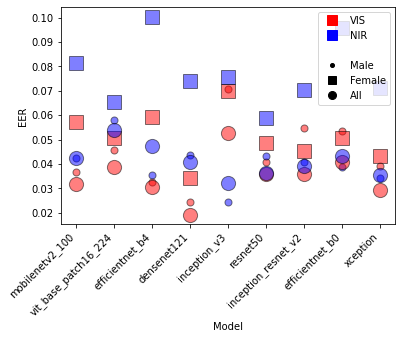

<Figure size 504x504 with 0 Axes>

In [2]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib

# matplotlib.use("pgf")
# matplotlib.rcParams.update({
#     "pgf.texsystem": "pdflatex",
#     'font.family': 'serif',
#     'text.usetex': True,
#     'pgf.rcfonts': False,
# })

vis = mlines.Line2D([], [], color='red', marker='s', linestyle='None',
                          markersize=10, label='VIS')
nir = mlines.Line2D([], [], color='blue', marker='s', linestyle='None',
                          markersize=10, label='NIR')

male = mlines.Line2D([], [], color='black', marker='.', linestyle='None',
                          markersize=8, label='Male')

female = mlines.Line2D([], [], color='black', marker='s', linestyle='None',
                          markersize=8, label='Female')

all = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
                          markersize=8, label='All')

blank = mlines.Line2D([],[],linestyle='')

plt.legend(handles=[vis, nir, blank, male, female, all])

plt.rcParams["figure.figsize"] = (7,7)
plt.xticks(rotation=45, ha='right')
col_dict = {'VIS': 'red', 'NIR': 'blue'}
marker_dict = {'male': '.', 'female': 's', 'all': 'o'}

for gender in ['male', 'female', 'all']:
    for spectrum in ['VIS', 'NIR']:
        df_n = df.copy()
        df_n = df_n[df_n['Gender'] == gender]
        df_n = df_n[df_n['Spectrum'] == spectrum]
        plt.scatter(x=df_n['Experiment ID'], y=df_n["EER"], marker=marker_dict[gender], color=col_dict[spectrum], edgecolors='black', alpha=0.5, s=200)
plt.xlabel('Model')
plt.ylabel("EER")
plt.show()
plt.savefig('vis_nir_face_casia_face_eer.pdf',  bbox_inches = 'tight')

In [1]:
import plotly.express as px
import pandas as pd
from copy import deepcopy
df_f = pd.read_csv(r"F:\Lab\nfs\nsf-ocular-bias\content\updates\results\imgs\csv\across_model_notredame_face_nir_subject_report.csv", header=1)
df_f = df_f.iloc[:-15]
df_o = pd.read_csv(r"F:\Lab\nfs\nsf-ocular-bias\content\updates\results\imgs\csv\across_model_notredame_ocular_nir_subject_report.csv", header=1)
df_o = df_o.iloc[:-15]
df_f['Modal'] = 'Face'
df_o['Modal'] = 'Ocular'

df = pd.concat([df_f, df_o])

df['Gender'] = df['Experiment ID'].apply(lambda x: x.split('_')[-1])
df['Experiment ID'] = df['Experiment ID'].apply(lambda x: '_'.join(x.split('_')[:-1]))
print(df.head())
df.to_csv('temp.csv')
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib

matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

vis = mlines.Line2D([], [], color='red', marker='s', linestyle='None',
                          markersize=8, label='Face')
nir = mlines.Line2D([], [], color='blue', marker='s', linestyle='None',
                          markersize=8, label='Ocular')

male = mlines.Line2D([], [], color='black', marker='.', linestyle='None',
                          markersize=8, label='Male')

female = mlines.Line2D([], [], color='black', marker='s', linestyle='None',
                          markersize=8, label='Female')

all = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
                          markersize=8, label='All')

blank = mlines.Line2D([],[],linestyle='')

plt.legend(handles=[vis, nir, blank, male, female, all])

plt.rcParams["figure.figsize"] = (7,7)
plt.xticks(rotation=45, ha='right')
col_dict = {'Face': 'red', 'Ocular': 'blue'}
marker_dict = {'male': '.', 'female': 's', 'all': 'o'}

for gender in ['male', 'female', 'all']:
    for spectrum in ['Face', 'Ocular']:
        df_n = df.copy()
        df_n = df_n[df_n['Gender'] == gender]
        df_n = df_n[df_n['Modal'] == spectrum]
        plt.scatter(x=df_n['Experiment ID'], y=df_n["FMR1000"], marker=marker_dict[gender], color=col_dict[spectrum], edgecolors='black', alpha=0.5, s=200)
plt.xlabel('Model')
plt.ylabel("TPR@FPR=0.001")
plt.yscale('log')
# plt.xscale('log')
ax = plt.gca()
# ax.set_xlim([xmin, xmax])
# ax.set_ylim([0.9, 1.0])
plt.show()
plt.savefig('face_ocular_notredame_nir_fmr100.pdf',  bbox_inches = 'tight')


     Experiment ID     GMean      GSTD     IMean      ISTD  \
0  efficientnet_b0  0.937477  0.071002  0.585342  0.131139   
1  efficientnet_b0  0.924380  0.074811  0.544630  0.134788   
2  efficientnet_b0  0.936872  0.069284  0.551110  0.145193   
3         xception  0.957691  0.060404  0.673763  0.117744   
4         xception  0.932494  0.066440  0.562530  0.129865   

   Sensitivity index (d')       AUC   J-Index  J-Index_TH       MCC  ...  \
0                3.339403  0.988769  0.899416    0.797771  0.879038  ...   
1                3.483745  0.992379  0.912047    0.772909  0.890608  ...   
2                3.391100  0.991497  0.913694    0.792152  0.890456  ...   
3                3.034253  0.981301  0.881237    0.848498  0.831825  ...   
4                3.586718  0.991167  0.906834    0.771212  0.879048  ...   

   ZeroFNMR    EER_TH  ZeroFMR_TH  FMR1000_TH  FMR100_TH  FMR20_TH  FMR10_TH  \
0  0.491737  0.795751    1.065118    0.987108   0.885812  0.796237  0.751989   
1  0.35557

<ipython-input-1-1635b7308163>:65: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [5]:
df_n.columns

Index(['Experiment ID', 'GMean', 'GSTD', 'IMean', 'ISTD',
       'Sensitivity index (d')', 'AUC', 'J-Index', 'J-Index_TH', 'MCC',
       'MCC_TH', 'EERlow', 'EERhigh', 'EER', 'ZeroFMR', 'FMR1000', 'FMR100',
       'FMR20', 'FMR10', 'ZeroFNMR', 'EER_TH', 'ZeroFMR_TH', 'FMR1000_TH',
       'FMR100_TH', 'FMR20_TH', 'FMR10_TH', 'ZeroFNMR_TH', 'Modal', 'Gender'],
      dtype='object')

In [2]:
import pandas as pd
df = pd.read_csv('temp.csv')
# df['EER-diff'] = df['EER Diff'].apply(lambda x: abs(x))
df.head()

import plotly.express as px

fig = px.bar(df, x='Experiment ID', y=['EER Diff'], title='', barmode='group',width=500, height=500,color='Spectrum',log_y=False, labels={'Experiment ID': 'Model', 'value': 'EER diff'})
fig.update_yaxes(matches=None)
fig.for_each_yaxis(lambda yaxis: yaxis.update(showticklabels=True))
fig.update_layout(font_family="Serif", font_size=14)
fig.show()
import plotly.io as pio
pio.write_image(fig, "test.pdf")